<a href="https://colab.research.google.com/github/ikbalsingh/cs276/blob/main/Question(C)and(D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bipartite graph of movies and directors creation and projection on directors

#### Question C :- creation of bipartite graph

#### Fetch dataset

In [1]:
import requests
import zipfile
import os

def download_and_extract_zip(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Request was successful, save the content to a local .zip file
        with open("downloaded_file.zip", "wb") as file:
            file.write(response.content)

        # Extract the .zip file
        with zipfile.ZipFile("downloaded_file.zip", 'r') as zip_ref:
            zip_ref.extractall()  # Extract the contents of the zip file to the current directory

        # Remove the downloaded .zip file
        os.remove("downloaded_file.zip")

        print(f"File extracted and saved.")
    else:
        print(f"Failed to download the .zip file. Status code: {response.status_code}")

# Usage
download_and_extract_zip("http://mozart.diei.unipg.it/gdcontest/contest2021/data/uploads/movie_remakes.zip")


File extracted and saved.


In [2]:
import pandas as pd
remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_edges_df

<ipython-input-2-265a90e65092>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


,director_original,director_remake,title_original,year_original,title_remake,year_remake
0,1,86,Don Juan,1926,Adventures of Don Juan,1948
1,48,46,Pépé le Moko,1937,Algiers,1938
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005
4,37,30,Little Mother,1935,Bachelor Mother,1939
...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966
98,32,21,The Women,1939,The Women,2008
99,32,17,The Women,1939,The Opposite Sex,1956
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955


In [3]:
import pandas
remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_nodes_df

<ipython-input-3-7755e794e150>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


,id,name
0,1,Alan Crosland
1,2,Alfred Hitchcock
2,3,Andrew Davis
3,4,Andrew Grieve
4,5,Anthony Asquith
...,...,...
86,87,W. S. Van Dyke
87,88,Wilhelm Thiele
88,89,William A. Wellman
89,90,William Nigh


#### Merging original and title to 1 node for bipartite creation

In [4]:
movies_with_years_df = remakes_edges_df.copy()  # Create a copy of the original DataFrame

# Combine 'title_original' and 'year_original' into a new column
movies_with_years_df['original_title_and_year'] = movies_with_years_df['title_original'] + ' (' + movies_with_years_df['year_original'].astype(str) + ')'
movies_with_years_df['remake_title_and_year'] = movies_with_years_df['title_remake'] + ' (' + movies_with_years_df['year_remake'].astype(str) + ')'
movies_with_years_df['original_and_remake_movie'] = movies_with_years_df['original_title_and_year'] + ' -- ' + movies_with_years_df['remake_title_and_year'].astype(str) + ')'

movies_with_years_df

,director_original,director_remake,title_original,year_original,title_remake,year_remake,original_title_and_year,remake_title_and_year,original_and_remake_movie
0,1,86,Don Juan,1926,Adventures of Don Juan,1948,Don Juan (1926),Adventures of Don Juan (1948),Don Juan (1926) -- Adventures of Don Juan (1948))
1,48,46,Pépé le Moko,1937,Algiers,1938,Pépé le Moko (1937),Algiers (1938),Pépé le Moko (1937) -- Algiers (1938))
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979,All Quiet on the Western Front (1930),All Quiet on the Western Front (1979),All Quiet on the Western Front (1930) -- All Q...
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005,Assault on Precinct 13 (1976),Assault on Precinct 13 (2005),Assault on Precinct 13 (1976) -- Assault on Pr...
4,37,30,Little Mother,1935,Bachelor Mother,1939,Little Mother (1935),Bachelor Mother (1939),Little Mother (1935) -- Bachelor Mother (1939))
...,...,...,...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966,The More the Merrier (1943),Walk Don't Run (1966),The More the Merrier (1943) -- Walk Don't Run ...
98,32,21,The Women,1939,The Women,2008,The Women (1939),The Women (2008),The Women (1939) -- The Women (2008))
99,32,17,The Women,1939,The Opposite Sex,1956,The Women (1939),The Opposite Sex (1956),The Women (1939) -- The Opposite Sex (1956))
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955,The Major and the Minor (1942),You're Never Too Young (1955),The Major and the Minor (1942) -- You're Never...


#### Graph creation

Bipartite graph where one set is directors and the other set is movies (one for both the original and remake)

In [6]:

director_movie_mapping = {}
names = {}
# Add edges for movies directed by the same director
for id, name in zip(remakes_nodes_df['id'],remakes_nodes_df['name']):
    names[id] = name
    director_movie_mapping[id] = set()
    for index, row in movies_with_years_df.iterrows():
        if row['director_original'] == id:
            director_movie_mapping[id].add( row['original_and_remake_movie'])
        if row['director_remake'] == id:
            director_movie_mapping[id].add( row['original_and_remake_movie'])
director_movie_mapping

{1: {'Don Juan (1926) -- Adventures of Don Juan (1948))'},
 2: {'Dial M for Murder (1954) -- A Perfect Murder (1998))',
  'Jamaica Inn (1939) -- Jamaica Inn (1983))',
  'Jamaica Inn (1939) -- Jamaica Inn (2014))',
  'Juno and the Paycock (1930) -- Juno and the Paycock (1980))',
  'Lifeboat (1944) -- Lifepod (1993))',
  'Notorious (1946) -- Notorious (1992))',
  'Psycho (1960) -- Psycho (1998))',
  'Rear Window (1954) -- Rear Window (1998))',
  'Shadow of a Doubt (1943) -- Shadow of a Doubt (1991))',
  'Shadow of a Doubt (1943) -- Strange Homecoming (1974))',
  'Suspicion (1941) -- Suspicion (1987))',
  'The 39 Steps (1935) -- The 39 Steps (1959))',
  'The 39 Steps (1935) -- The 39 Steps (2008))',
  'The 39 Steps (1935) -- The Thirty Nine Steps (1978))',
  'The Lady Vanishes (1938) -- The Lady Vanishes (1979))',
  'The Lodger (1927) -- Man in the Attic (1953))',
  'The Lodger (1927) -- The Lodger (1932))',
  'The Lodger (1927) -- The Lodger (1944))',
  'The Lodger (1927) -- The Lodger (

In [7]:
movie_set = set()

for movies in director_movie_mapping.values():
    movie_set.update(movies)


In [8]:
import networkx as nx

directors = [names[x] for x in director_movie_mapping.keys()]

movie_set = set()

for movies in director_movie_mapping.values():
    movie_set.update(movies)


G = nx.Graph()
G.add_nodes_from(directors, bipartite=0) # Add the node attribute "bipartite"
G.add_nodes_from(movie_set, bipartite=1)

edge_list = []
for director, movies in director_movie_mapping.items():
    for movie in movies :
        G.add_edge(names[director], movie)

left_partition = directors
right_partition = movie_set

# Define the layout for the nodes
pos = {}
left_x = 0
right_x = 1

for i, node in enumerate(left_partition):
    pos[node] = (0, i*100)
for i, node in enumerate(right_partition):
    pos[node] = (10, i*100)


#### Graph visualization

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


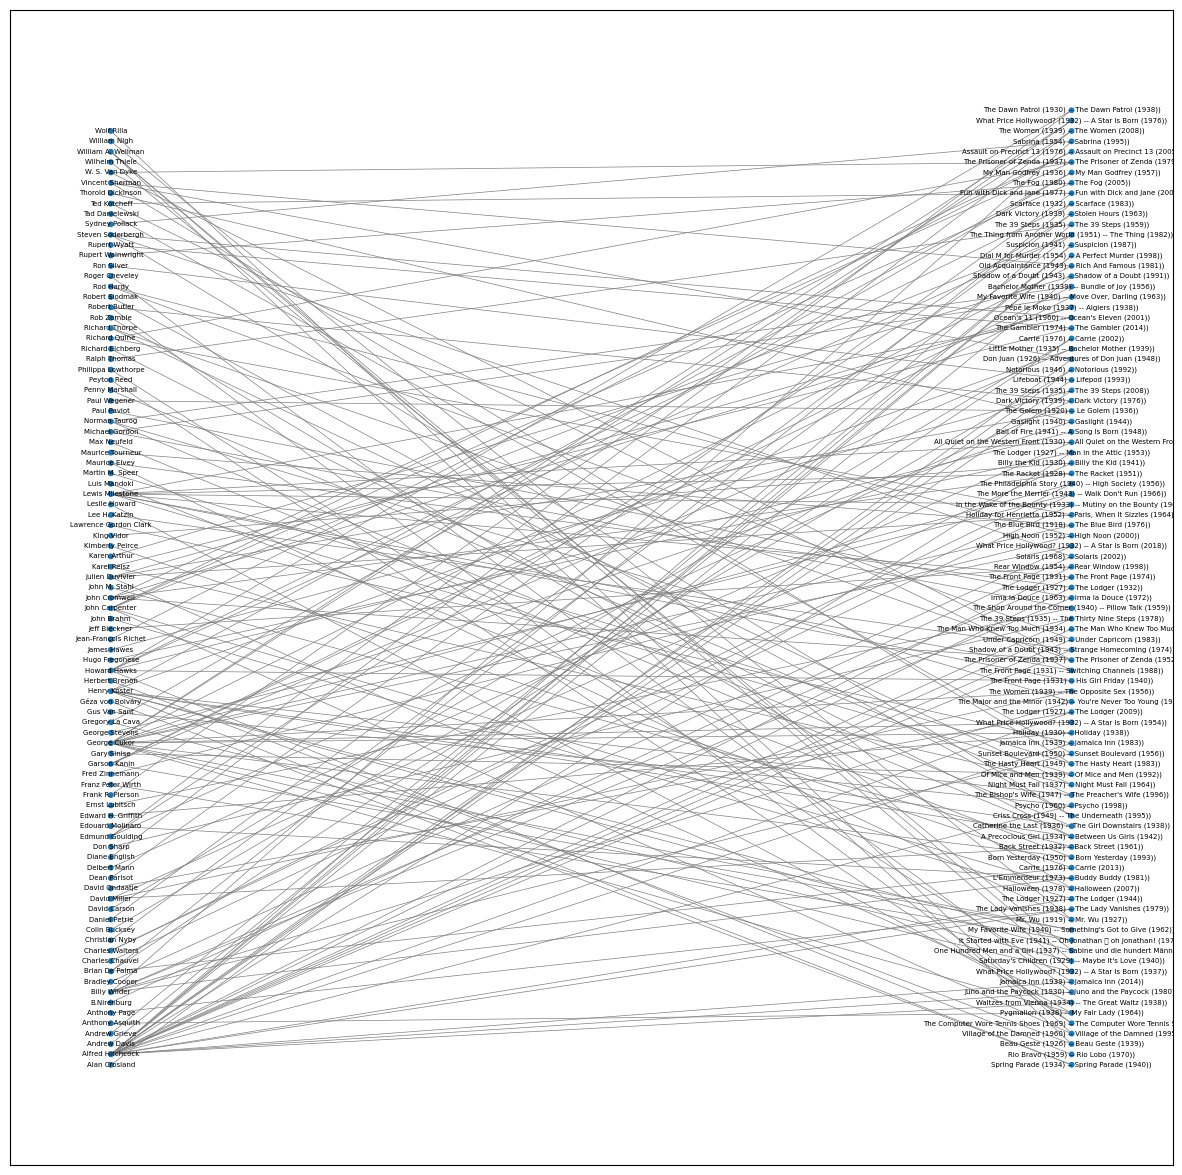

In [9]:
import matplotlib.pyplot as plt


def plot_graph_networkx(G, pos, node_size=10, node_label_size = 5, show_edge_labels = False, edge_label_size=4):
    # node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
    ax = plt.gca()
    ax.set_facecolor('white')

    # Define a colormap for coloring components
    cmap = plt.get_cmap('tab20')

    components = list(nx.connected_components(G))

    # Create a dictionary to map nodes to colors
    node_colors = {}
    for i, component in enumerate(components):
        color = cmap(i % 87)  # You can adjust the number of colors as needed
        for node in component:
            node_colors[node] = color

    # Draw nodes with desired node color
    # nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color = [node_colors[node] for node in G.nodes()])

    # Draw edges with a specific edge width and color
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')

    # Add labels for nodes
    node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, {k: (x, y + 0.01) for k, (x, y) in pos.items()}, font_size=node_label_size)

    # # Add labels for edges
    if show_edge_labels:
        edge_labels = {(u, v): data.get("label", "") for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_label_size, font_color='red')

    # Turn off axis labels and display the plot
    ax.set_xticks([])  # Turn off x-axis labels
    ax.set_yticks([])  # Turn off y-axis labels
    plt.show()


def plot_graph_plotly(G, pos):
    node_x = []
    node_y = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    edge_x = []
    edge_y = []

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.25, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=[pos[node][0] for node in G.nodes()],
        y=[pos[node][1] for node in G.nodes()],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,  # Do not use a colorscale
            size=5,
            colorbar=dict(
                thickness=15,
                title='Node Department',
                xanchor='left',
                titleside='right'
            )
        )
    )

    # Add node labels if you want
    node_text = list(G.nodes())
    node_trace.text = node_text
    layout = go.Layout(
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=0),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        # width=20*40,  # 20 by 20 figure size (20 units per inch)
        height=20*40,
    )

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

plot_graph_networkx(G, pos)

#### Interactive visualisation using Plotly

In [11]:
import plotly.graph_objects as go


node_x = []
node_y = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.25, color='#888'),
    hoverinfo='text',
    mode='lines')

node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,  # Do not use a colorscale
        size=5,
        colorbar=dict(
            thickness=15,
            title='Node Department',
            xanchor='left',
            titleside='right'
        )
    )
)

# Add node labels if you want
node_text = list(G.nodes())
node_trace.text = node_text
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    # width=20*40,  # 20 by 20 figure size (20 units per inch)
    height=20*40,
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

#### Visualization of random sample of the graph with 20 edges

In [12]:
import random

# Sample a subset of edges from the original graph
sampled_edges = random.sample(G.edges, k=20)  # Change k to the number of edges you want to sample

# Create a new graph using the sampled edges
sampled_graph = G.edge_subgraph(sampled_edges)

<ipython-input-12-c455cc3a92b0>:4: DeprecationWarning:

Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.



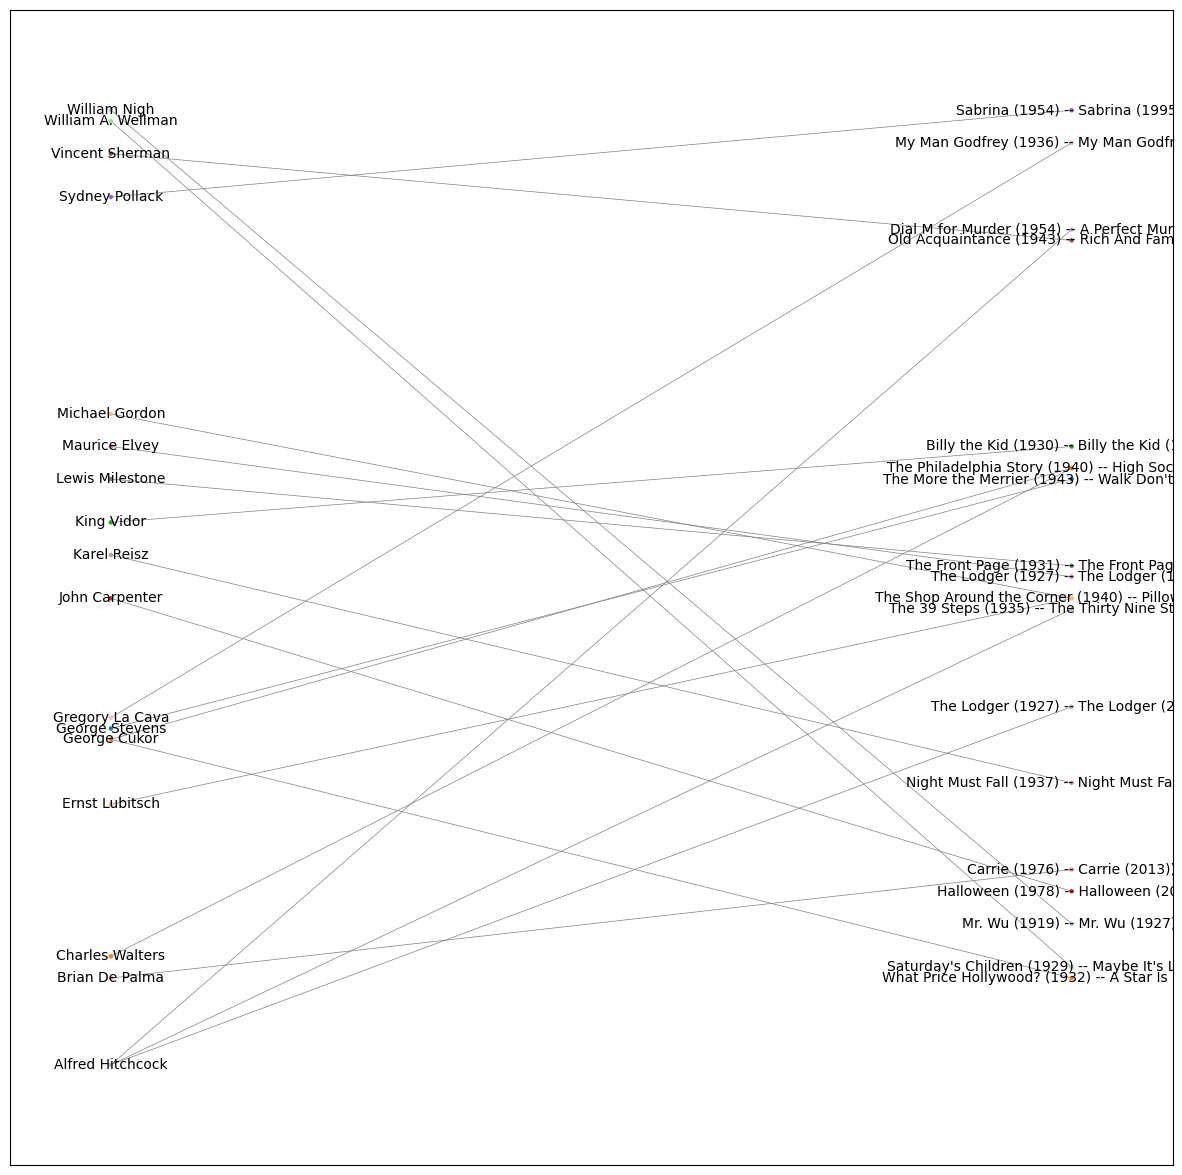

In [13]:
plot_graph_networkx(sampled_graph, pos, node_size=5, node_label_size = 10)

In [14]:
plot_graph_plotly(sampled_graph, pos)

In [15]:
# Characteristics of the network
print(f"Nodes : {G.number_of_nodes()}")
print(f"Edges : {G.number_of_edges()}")


Nodes : 184
Edges : 187


## Question D

#### Projection of the bipartite graph on directors

Two directors are connected if they direct the same movie

In [16]:
X = nx.bipartite.projected_graph(G, directors)


#### Visualisation of the projected graph

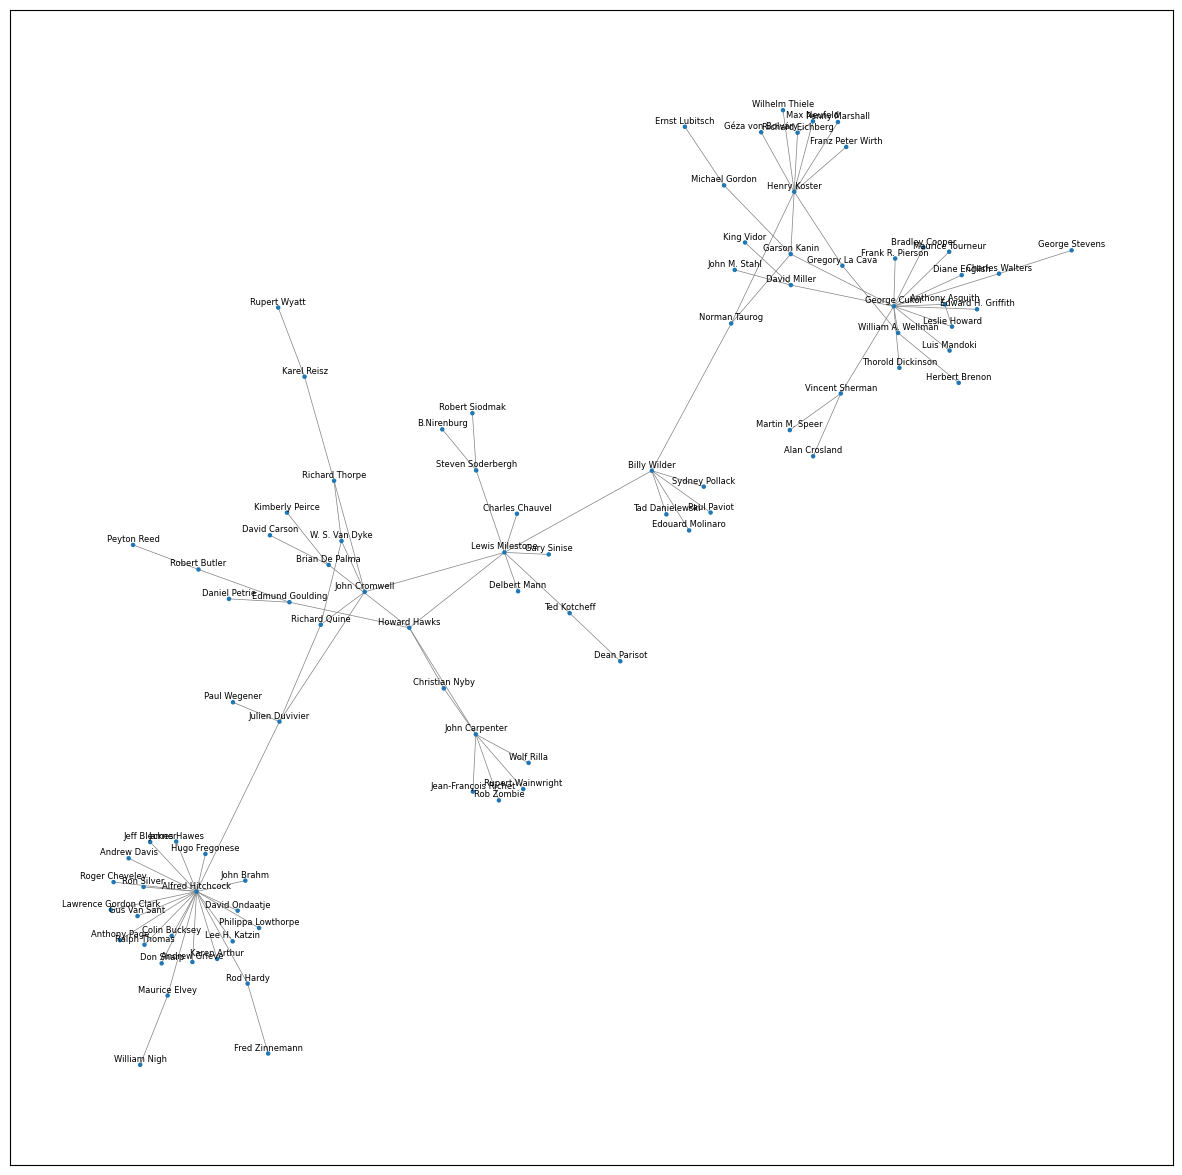

In [18]:
plot_graph_networkx(X, nx.spring_layout(X), node_size=5, node_label_size = 6)

In [19]:
plot_graph_plotly(X, nx.spring_layout(X))

#### Top 5 nodes according to degree centrality

In [20]:
# Calculate the degree centrality for each node
degree_centrality = nx.degree_centrality(X)

# Sort nodes by degree centrality in descending order and get the top 5 nodes
top_5_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

print("Top 5 nodes with the highest degree centrality:")
for node in top_5_nodes:
    print(f"{node}: Degree Centrality = {degree_centrality[node]}")

Top 5 nodes with the highest degree centrality:
Alfred Hitchcock: Degree Centrality = 0.23333333333333334
George Cukor: Degree Centrality = 0.15555555555555556
Henry Koster: Degree Centrality = 0.1
Lewis Milestone: Degree Centrality = 0.08888888888888889
Billy Wilder: Degree Centrality = 0.06666666666666667


#### Top 5 nodes according to betweenness centrality

In [21]:
# Calculate the degree centrality for each node
betweenness_centrality = nx.betweenness_centrality(X)

# Sort nodes by degree centrality in descending order and get the top 5 nodes
top_5_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]

print("Top 5 nodes with the highest Betweenness centrality:")
for node in top_5_nodes:
    print(f"{node}: Betweenness Centrality = {betweenness_centrality[node]}")

Top 5 nodes with the highest Betweenness centrality:
Lewis Milestone: Betweenness Centrality = 0.6938826466916355
Billy Wilder: Betweenness Centrality = 0.5188514357053683
John Cromwell: Betweenness Centrality = 0.4716604244694132
Norman Taurog: Betweenness Centrality = 0.4566791510611735
Alfred Hitchcock: Betweenness Centrality = 0.4307116104868914


#### Top 5 nodes according to closeness centrality

In [22]:
# Calculate the degree centrality for each node
closeness_centrality = nx.closeness_centrality(X)

# Sort nodes by degree centrality in descending order and get the top 5 nodes
top_5_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]

print("Top 5 nodes with the highest Closeness centrality:")
for node in top_5_nodes:
    print(f"{node}: Closeness Centrality = {closeness_centrality[node]}")

Top 5 nodes with the highest Closeness centrality:
Lewis Milestone: Closeness Centrality = 0.28213166144200624
Billy Wilder: Closeness Centrality = 0.26785714285714285
John Cromwell: Closeness Centrality = 0.25862068965517243
Norman Taurog: Closeness Centrality = 0.24793388429752067
Howard Hawks: Closeness Centrality = 0.2356020942408377


#### Top 5 nodes according to eigen vector centrality

In [24]:
# Calculate the eigen vector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(X)

# Sort nodes by eigen vector centrality in descending order and get the top 5 nodes
top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

print("Top 5 nodes with the highest Eigen Vector centrality:")
for node in top_5_nodes:
    print(f"{node}: Eigen Vector Centrality = {eigenvector_centrality[node]}")

Top 5 nodes with the highest Eigen Vector centrality:
Alfred Hitchcock: Eigen Vector Centrality = 0.697816100537558
Julien Duvivier: Eigen Vector Centrality = 0.18975113319235545
Maurice Elvey: Eigen Vector Centrality = 0.1584241695162404
Rod Hardy: Eigen Vector Centrality = 0.1584241695162404
Andrew Davis: Eigen Vector Centrality = 0.15100551637497778
